In [1]:
%load_ext autoreload
%matplotlib widget
%autoreload 2
from amftrack.pipeline.launching.run_super import (
    run_launcher,
    directory_scratch,
    directory_project,
    directory_project,
    run_parallel_stitch,
    run_parallel_transfer,
)
import os
from amftrack.util.sys import (
    get_dates_datetime,
    get_dirname,
    temp_path,
    get_data_info,
    update_plate_info,
    update_analysis_info,
    get_analysis_info,
    get_current_folders,
    get_folders_by_plate_id,
)
from time import time_ns
from amftrack.util.dbx import upload_folders, load_dbx, download, get_dropbox_folders
from datetime import datetime

from amftrack.pipeline.functions.image_processing.experiment_class_surf import (
    load_graphs,
)
from amftrack.pipeline.functions.post_processing.extract_study_zone import (
    load_study_zone,
)
from amftrack.pipeline.functions.image_processing.experiment_util import (
    get_random_edge,
    distance_point_edge,
    plot_edge,
    plot_edge_cropped,
    find_nearest_edge,
    get_edge_from_node_labels,
    plot_full_image_with_features,
    get_all_edges,
    get_all_nodes,
    find_neighboring_edges,
    reconstruct_image,
    reconstruct_skeletton_from_edges,
    reconstruct_skeletton_unicolor,
    plot_edge_color_value,
    reconstruct_image_from_general,
    plot_full,
    find_nearest_edge,
)
from amftrack.pipeline.functions.image_processing.extract_width_fun import (
    get_width_info,
    get_width_info_new,
)
import matplotlib.pyplot as plt
from amftrack.pipeline.functions.image_processing.experiment_class_surf import (
    Experiment,
    save_graphs,
    find_node_equ,
)
import pandas as pd
from amftrack.pipeline.functions.spore_processing.spore_id import make_spore_data
from amftrack.pipeline.functions.image_processing.hyphae_id_surf import (
    resolve_anastomosis_crossing_by_root,
)
from amftrack.pipeline.functions.post_processing.time_hypha import *
from amftrack.pipeline.functions.image_processing.experiment_class_surf import (
    Node,
    Edge,
    Hyphae,
    get_distance,
)
from amftrack.util.sys import (
    get_analysis_folders,
    get_time_plate_info_from_analysis,
    get_time_hypha_info_from_analysis,
    get_global_hypha_info_from_analysis,
)

from datetime import datetime
from matplotlib import cm
from amftrack.pipeline.functions.post_processing.extract_study_zone import (
    load_study_zone,
)
from IPython.display import clear_output
from amftrack.pipeline.functions.post_processing.exp_plot import *
import pickle

/gpfs/home2/cbisot/pycode/AMFtrack/amftrack/util/dbx.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm
2023-04-07 13:45:58.911109: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-07 13:45:59.324254: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /gpfs/home2/cbisot/miniconda3/envs/amftrack/lib/python3.7/site-packages/cv2/../../lib64:
2023-04-07 13:45:59.324285: I tensorflow/stream_executor/cuda/cudart_stub.cc:29

SyntaxError: invalid syntax (area_hulls_util.py, line 256)

In [ ]:
def get_time(exp, t, tp1):  # redefined here to avoid loop in import
    seconds = (exp.dates[tp1] - exp.dates[t]).total_seconds()
    return seconds / 3600

In [ ]:
plates = ["94_20201123"]
directory_targ = directory_project
update_analysis_info(directory_targ)
analysis_info = get_analysis_info(directory_targ)
analysis_folders = analysis_info.loc[analysis_info["unique_id"].isin(plates)]
# update_plate_info(directory_targ, local=True)
# all_folders = get_current_folders(directory_targ, local=True)

In [ ]:
all_analysis_folders = get_analysis_folders(directory_targ)
analysis_folders_info = all_analysis_folders.loc[
    all_analysis_folders["unique_id"].isin(plates)
]
folders, time_plate_info = get_time_plate_info_from_analysis(
    analysis_folders_info, use_saved=False
)
folders, time_hypha_info = get_time_hypha_info_from_analysis(
    analysis_folders_info, use_saved=False
)

In [50]:
list(time_hypha_info.groupby("end").count()["speed"])

[165,
 139,
 5,
 154,
 4,
 4,
 97,
 165,
 17,
 165,
 111,
 151,
 122,
 21,
 101,
 141,
 29,
 165,
 165,
 152,
 55,
 165,
 165,
 165,
 20,
 165,
 165,
 89,
 117,
 158,
 3,
 165,
 154,
 156,
 165,
 165,
 98,
 77,
 165,
 4,
 165,
 10,
 165,
 94,
 159,
 104,
 3,
 49,
 10,
 165,
 53,
 130,
 46,
 100,
 160,
 115,
 127,
 165,
 5,
 165,
 40,
 165,
 66,
 5,
 4,
 6,
 3,
 26,
 65,
 8,
 39,
 38,
 65,
 9,
 65,
 25,
 15,
 65,
 14,
 51,
 13,
 28,
 19,
 65,
 61,
 18,
 8,
 44,
 29,
 27,
 9,
 6,
 52,
 51,
 65,
 23,
 4,
 7,
 51,
 4,
 5,
 65,
 65,
 8,
 16,
 65,
 5,
 38,
 5,
 4,
 38,
 33,
 38,
 48,
 64,
 18,
 12,
 24,
 50,
 7,
 64,
 24,
 55,
 4,
 64,
 4,
 61,
 64,
 15,
 4,
 62,
 9,
 24,
 4,
 25,
 64,
 41,
 64,
 20,
 3,
 11,
 51,
 3,
 5,
 6,
 64,
 64,
 3,
 8,
 3,
 54,
 10,
 3,
 4,
 48,
 64,
 63,
 3,
 23,
 63,
 11,
 63,
 63,
 6,
 63,
 63,
 63,
 5,
 5,
 3,
 63,
 27,
 6,
 3,
 28,
 12,
 8,
 16,
 63,
 7,
 3,
 11,
 9,
 3,
 3,
 15,
 63,
 63,
 63,
 7,
 46,
 8,
 4,
 3,
 4,
 45,
 23,
 55,
 4,
 20,
 62,
 60,
 16,
 62,

In [5]:
path_exp = f'{directory_targ}{analysis_folders["path_exp"].iloc[0]}'
exp = pickle.load(open(path_exp, "rb"))
exp.save_location = "/"
try:
    exp.labeled
except AttributeError:
    exp.labeled = True
load_graphs(exp, directory_targ, indexes=range(89, 91))
load_graphs(exp, directory_targ, indexes=[90, 70, 60])

load_study_zone(exp)

In [6]:
for t in range(exp.ts):
    exp.load_tile_information(t)

In [7]:
hyph = [hyph for hyph in exp.hyphaes if hyph.end.label == 0][0]
hyph.root = Node(44, exp)
hyph = [hyph for hyph in exp.hyphaes if hyph.end.label == 6][0]
hyph.root = Node(147, exp)

In [8]:
list_hyph = [0, 6, 118, 58, 1, 85]
# list_hyph = [521770,535353,509730]
# list_hyph = [509730]
# list_hyph = [1]

In [7]:
tf = 90

# list_hyph = [hyph for hyph in exp.hyphaes if hyph.end.is_in(hyph.ts[-1]) and np.linalg.norm(hyph.end.pos(hyph.ts[-1])-hyph.get_root(hyph.ts[-1]).pos(hyph.ts[-1]))>=1e3]
list_hyph_obj = [
    hyph
    for hyph in exp.hyphaes
    if hyph.end.is_in(tf)
    and len(hyph.root.ts()) >= 1
    and np.linalg.norm(hyph.end.pos(tf) - hyph.get_root(tf).pos(tf)) >= 1e4
]
list_hyph_tot = [hyph.end.label for hyph in list_hyph_obj]

In [38]:
from random import choice

list_hyph = [choice(list_hyph_tot)]

In [13]:
def get_length_fast(edge, t):
    return np.linalg.norm(edge.begin.pos(t) - edge.end.pos(t))


fbas = lambda edge: np.log(
    edge.width(edge.ts()[-1])
    * edge.length_um(edge.ts()[-1])
    * edge.end.degree(edge.ts()[-1])
    * edge.begin.degree(edge.ts()[-1])
)  # function to evaluate BASness, typical threshold is 10
f = lambda edge: np.log(
    edge.width(edge.ts()[-1])
    * get_length_fast(edge, edge.ts()[-1])
    * edge.end.degree(edge.ts()[-1])
    * edge.begin.degree(edge.ts()[-1])
)  # function to evaluate BASness, typical threshold is 10

In [33]:
actual_list_hyph = []
all_distances = []
all_time_distances = []

for end in list_hyph:
    hyph_label = end
    hyph = [hyph for hyph in exp.hyphaes if hyph.end.label == end][0]
    t0 = hyph.ts[0]
    exp = hyph.experiment
    thresh = 1600
    junctions_found = [hyph.end.neighbours(t0)[0]]
    ts = []
    mult = []
    speeds = []
    print(end)
    select = time_hypha_info.loc[time_hypha_info["end"] == end]

    for t in hyph.ts:
        select_t = select.loc[select["timestep"] == t - 1]
        speed = select_t["speed"].iloc[0] if len(select_t) > 0 else -1
        if t < tf:
            try:
                G = exp.nx_graph[t]
                G = G.subgraph(nx.node_connected_component(G, hyph.end.label))
                if hyph.end.degree(t) == 1:
                    nodes, edges = hyph.get_nodes_within(t)
                    potentials = []
                    nodes = [Node(node, exp) for node in nodes]
                    try:
                        last_junction_index = nodes.index(junctions_found[-1])
                    except:
                        last_junction_index = 0
                    for node in nodes[last_junction_index + 1 : -1]:
                        dist = np.linalg.norm(node.pos(t) - hyph.end.pos(t))
                        # To avoid detecting two times the same  node with different labels
                        dists_junction_found = [np.inf] + [
                            np.linalg.norm(node.pos(t) - nodo.pos(t))
                            for nodo in junctions_found
                            if nodo.is_in(t)
                        ]
                        if (
                            dist < thresh
                            and min(dists_junction_found) > 40
                            and (node not in junctions_found)
                        ):
                            extra_hypha_neighbours = [
                                nodo for nodo in node.neighbours(t) if nodo not in nodes
                            ]

                            edges = [
                                Edge(node, nodo, exp) for nodo in extra_hypha_neighbours
                            ]
                            is_rh = [f(edge) >= 10 for edge in edges]
                            tips = [
                                nodo
                                for nodo in extra_hypha_neighbours
                                if nx.edge_connectivity(G, nodo.label, node.label) == 1
                            ]
                            # if len(tips) == node.degree(t) - 2:

                            if len(tips) == node.degree(t) - 2 and np.any(is_rh):
                                junctions_found.append(node)
                                mult.append(node.degree(t) - 2)
                                ts.append(t)
                                speeds.append(speed)
            except nx.exception.NetworkXNoPath:
                print(hyph, t)

    junctions_found_tf = [find_node_equ(node, tf) for node in junctions_found]
    junctions_found_tf = [
        node
        for node in junctions_found_tf
        if nx.has_path(exp.nx_graph[tf], node.label, junctions_found_tf[0].label)
    ]
    junctions_found_label = [node.label for node in junctions_found_tf]
    t_real = [get_time(exp, t0, t) for t in ts]
    try:

        distances = [
            get_distance(junctions_found_tf[i], junctions_found_tf[i + 1], tf)
            for i in range(1, len(junctions_found_tf) - 1)
        ]
        time_distances = [
            distance / speeds[i + 1] for i, distance in enumerate(distances)
        ]
        all_distances += distances
        all_time_distances += time_distances

        np.save(f"branches/ts_{hyph_label}_auto", t_real)
        np.save(f"branches/distances_{hyph_label}_auto", distances)
        np.save(f"branches/times_{hyph_label}_auto", time_distances)

        actual_list_hyph.append(end)
    except nx.exception.NetworkXNoPath:
        print("problem with", end)

550236


(array([12., 13.,  5.,  5.,  3.,  1.,  1.,  2.]),
 array([ 0.24004585,  3.69837301,  7.15670018, 10.61502734, 14.07335451,
        17.53168167, 20.99000884, 24.44833601, 27.90666317]),
 <BarContainer object of 8 artists>)

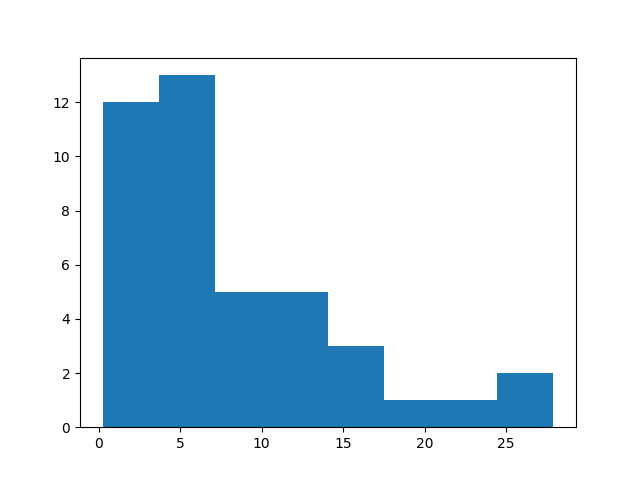

In [16]:
fig, ax = plt.subplots()

ax.hist(all_time_distances, 8)

In [17]:
np.mean(all_time_distances)

8.276211395737462

In [35]:
all_time_distances

[]

(array([8., 6., 8., 6., 2., 1., 5., 1., 3., 0., 0., 2.]),
 array([  75.67164153,  747.94695195, 1420.22226237, 2092.49757279,
        2764.77288322, 3437.04819364, 4109.32350406, 4781.59881448,
        5453.8741249 , 6126.14943533, 6798.42474575, 7470.70005617,
        8142.97536659]),
 <BarContainer object of 12 artists>)

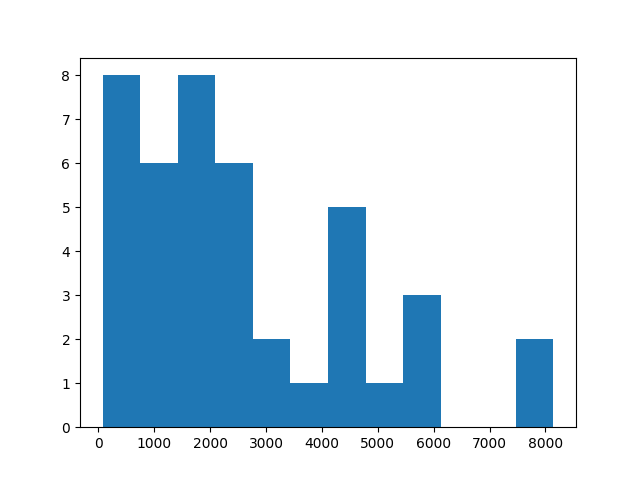

In [14]:
fig, ax = plt.subplots()

ax.hist(all_distances, 12)

In [17]:
tf = 90

list_hyph_obj = [
    hyph for hyph in exp.hyphaes if hyph.end.is_in(tf) and len(hyph.root.ts()) >= 1
]
edges = [hyph.get_nodes_within(tf)[1] for hyph in list_hyph_obj]
edges = [item for sublist in edges for item in sublist]

In [59]:
t = 70
tips = [node for node in get_all_nodes(exp, t) if node.degree(t) == 1]


def h(edge, t):
    boolean = (edge.end.degree(t) == 1 or edge.begin.degree(t) == 1) and edge.length_um(
        t
    ) >= 1000
    # boolean +=((edge.width(t)*edge.length_um(t))<3000)*edge.width(t)<7
    return boolean


edges = get_all_edges(exp, t)
edges = [
    edge
    for edge in edges
    if np.all(is_in_study_zone(edge.begin, t, 1000, 150, is_circle))
]
edges = [
    edge
    for edge in edges
    if np.all(is_in_study_zone(edge.end, t, 1000, 150, is_circle))
]
edge_tip = [edge for edge in edges if h(edge, t)]

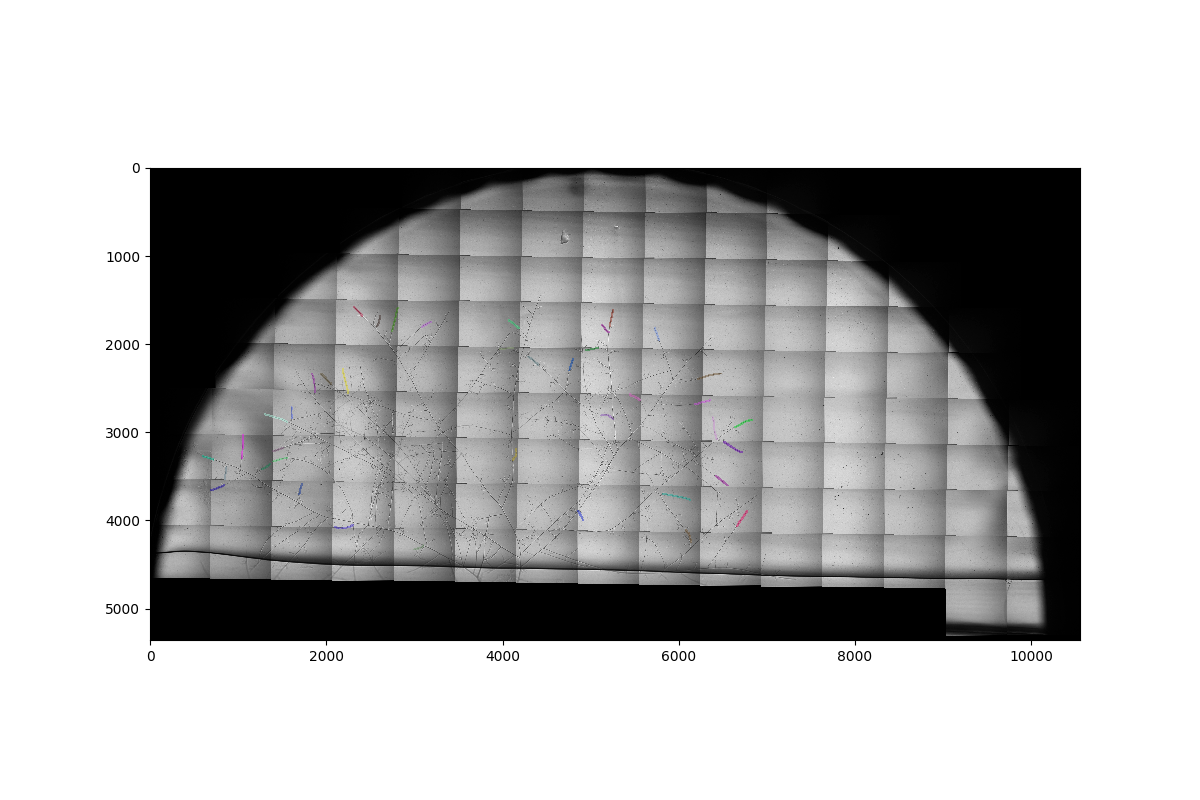

In [60]:
plt.close("all")
exp.load_tile_information(t)

ax = plot_full(
    exp,
    t,
    # nodes = junctions_found_tf
    edges=edge_tip,
    # nodes = tip_disappear,
    dilation=20,
)

In [64]:
params = cv2.SimpleBlobDetector_Params()
params.maxArea

5000.0

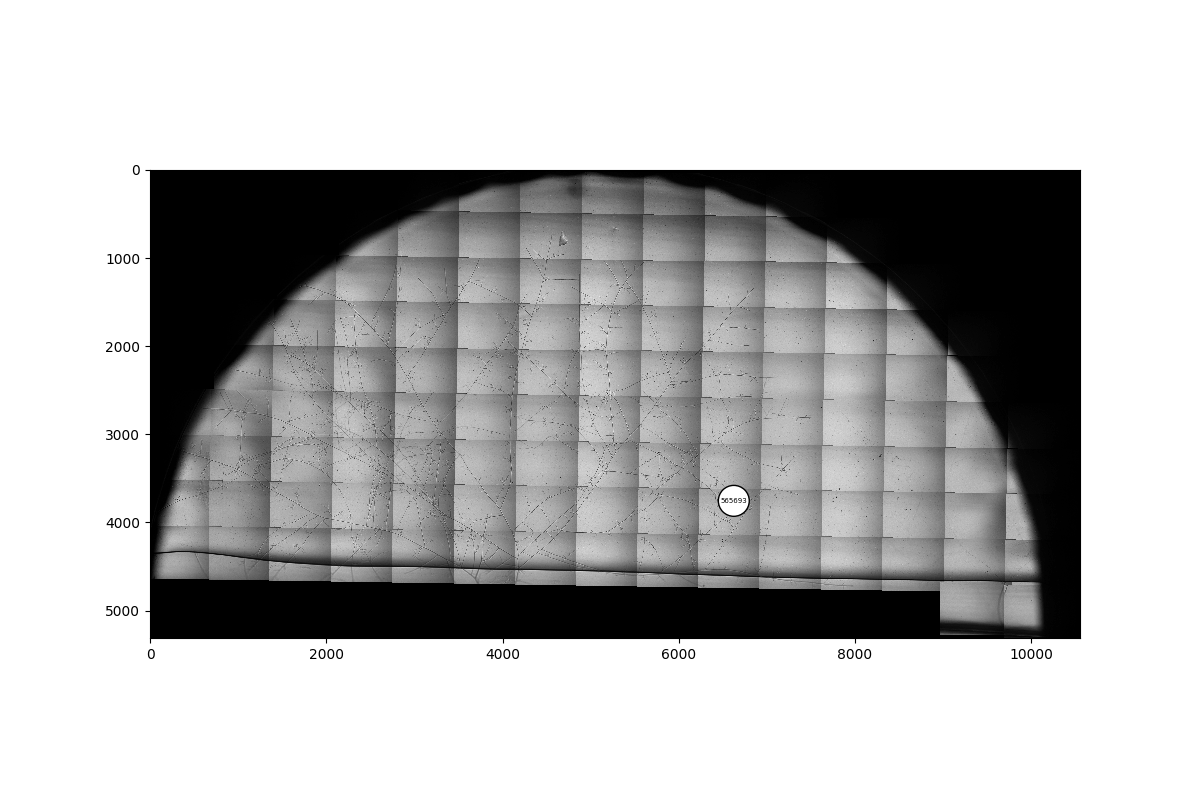

In [34]:
plt.close("all")
ax = plot_full_image_with_features(
    exp,
    tf,
    nodes=junctions_found_tf
    # nodes = [Node(607965,exp),Node(518481,exp)]
)

In [18]:
t = 50
nodes = get_all_nodes(exp, t)
tips = [
    node
    for node in nodes
    if node.degree(t) == 1 and node.is_in(t + 1) and len(node.ts()) > 2
]
tips = [tip for tip in tips if np.all(is_in_study_zone(tip, t, 1000, 150, False))]
max_t = 99
growing_tips = []

for tip in tips:
    timesteps = [tim for tim in tip.ts() if tim <= max_t]
    tim = timesteps[-1] if len(timesteps) > 0 else tip.ts[-1]
    if np.linalg.norm(tip.pos(tim) - tip.pos(t)) >= 40:
        growing_tips.append(tip)


growing_rhs = [
    node
    for node in growing_tips
    if np.linalg.norm(node.pos(node.ts()[0]) - node.pos(min(node.ts()[-1], 99))) >= 0
]

# growing_rhs = [
#     node
#     for node in growing_tips
#     if f(node.edges(node.ts()[-1])[0])>=10
# ]
new_tips = [tip for tip in growing_tips if tip.ts()[0] == t]
new_tips

[Node(528566),
 Node(527712),
 Node(528453),
 Node(528442),
 Node(528452),
 Node(528433),
 Node(527644),
 Node(528176),
 Node(528504),
 Node(527974),
 Node(527992),
 Node(528632),
 Node(527735),
 Node(527780),
 Node(528564),
 Node(528479),
 Node(527717),
 Node(527696),
 Node(527705),
 Node(528299)]

In [25]:
tips = [
    node
    for node in nodes
    if node.degree(t) == 1 and node.is_in(t + 1) and len(node.ts()) > 2
]
tips = [tip for tip in tips if np.all(is_in_study_zone(tip, t, 1000, 150, False))]
growing_tips = []
for tip in tips:
    timesteps = [tim for tim in tip.ts() if tim <= max_t]
    tim = timesteps[-1] if len(timesteps) > 0 else tip.ts()[-1]
    if np.linalg.norm(tip.pos(tim) - tip.pos(t)) >= 40:
        growing_tips.append(tip)
new_tips = [tip for tip in growing_tips if tip.ts()[0] == t]
new_tips

[Node(528566),
 Node(527712),
 Node(528453),
 Node(528442),
 Node(528452),
 Node(528433),
 Node(527644),
 Node(528176),
 Node(528504),
 Node(527974),
 Node(527992),
 Node(528632),
 Node(527735),
 Node(527780),
 Node(528564),
 Node(528479),
 Node(527717),
 Node(527696),
 Node(527705),
 Node(528299)]

In [17]:
t = 50
new_tips = [tip for tip in growing_tips if tip.ts()[0] == t]
new_tips

[]

In [28]:
nodes = [hyph.end for hyph in list_hyph_obj] + [
    hyph.get_root(tf) for hyph in list_hyph_obj
]
# nodes = [hyph.end for hyph in list_hyph if hyph.end.is_in(tf)]

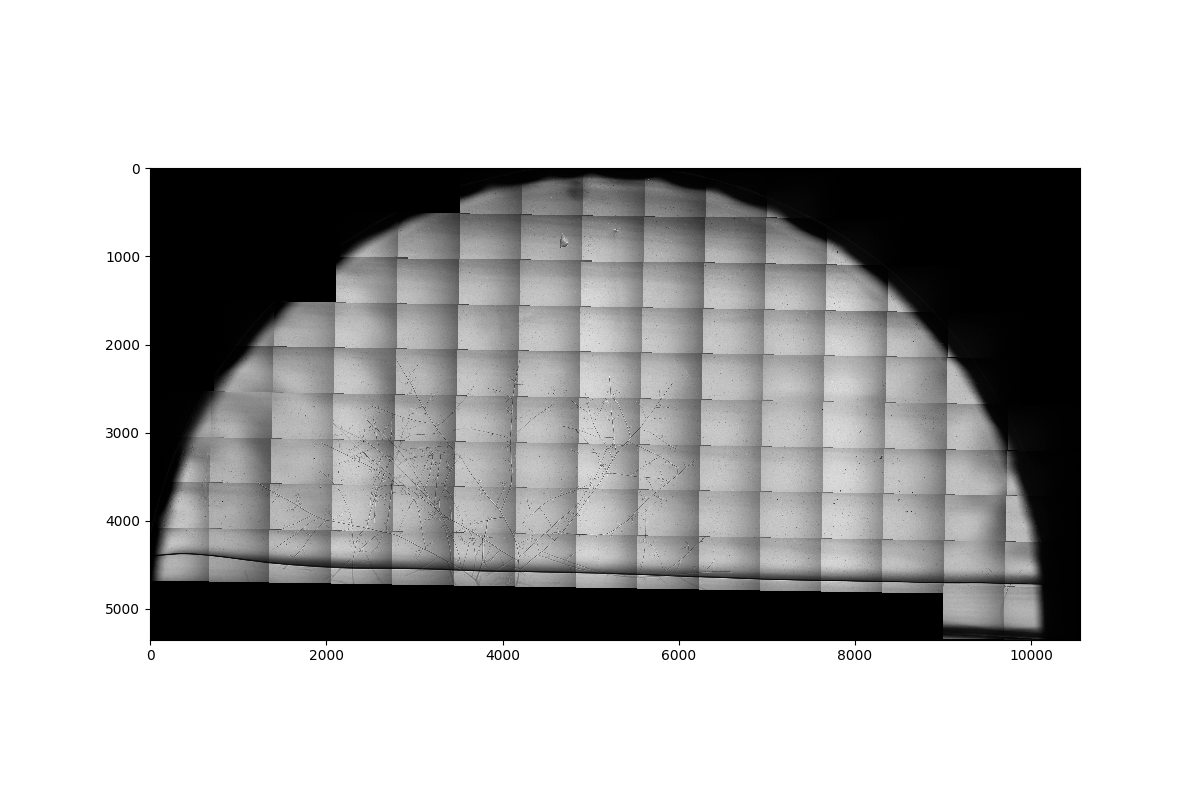

In [10]:
plt.close("all")
ax = plot_full_image_with_features(exp, t, nodes=new_tips)

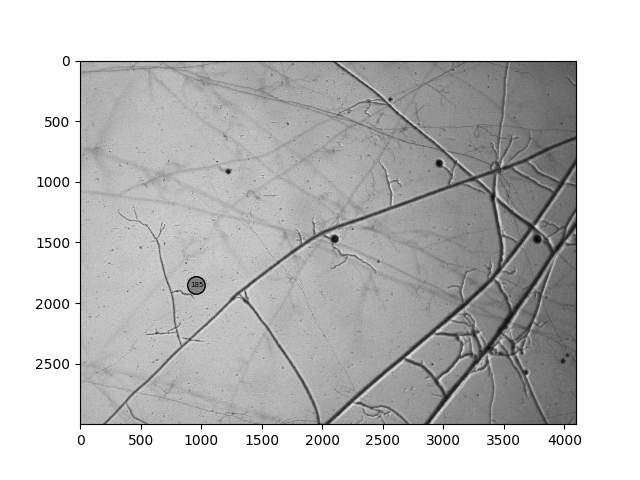

In [11]:
label = 185
Node(label, exp).show_source_image(Node(label, exp).ts()[-1])

In [31]:
Node(254, exp).ts()

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159]

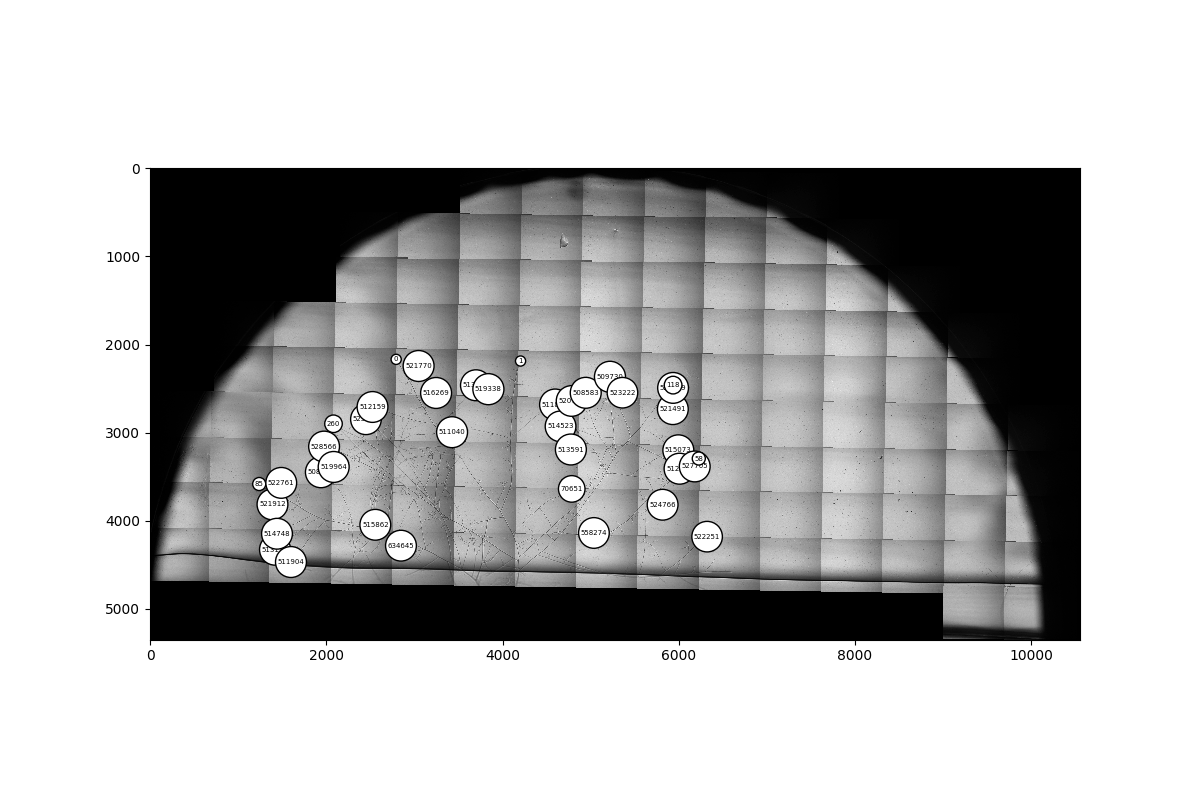

In [19]:
plt.close("all")
ax = plot_full_image_with_features(exp, t, nodes=growing_rhs)